In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import dabest
import itertools
from scipy import stats

In [2]:
# Plot Configs
plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

In [3]:
def read_data(file: str, file_number: int) -> pd.DataFrame:
    """Read experiment csv dataset.

    Parameters
    ----------
    file : str
        filename
    file_number : int
        file number in order.

    Returns
    -------
    pd.DataFrame
        Dataframe column info:
    """
    df = pd.read_csv(file)
    df.columns = ["file", "d0", "d1", "d2"]
    df["file"] = file_number
    return df

In [4]:
# Load data, use only D11 dataset.
files = [
    '190305_A549-BSA_aGPIb_SMA_1hr_04_590CG_p50d1.csv',
    '190305_A549-BSA_aGPIb_SMA_1hr_05_590CG_p50d1.csv',
    '190305_A549-BSA_aGPIb_SMA_1hr_06_590CG_p50d1.csv',
    '190305_A549-Tb_aGPIb_SMA_1hr_01_590CG_p50d1.csv',
    '190305_A549-Tb_aGPIb_SMA_1hr_02_590CG_p50d1.csv',
    '190305_A549-Tb_aGPIb_SMA_1hr_03_590CG_p50d1.csv',
]
df_list = [read_data(file, i + 1) for i, file in enumerate(files)]

In [5]:
df51 = pd.concat(df_list[0:3], axis=0, ignore_index=True)
df52 = pd.concat(df_list[3:6], axis=0, ignore_index=True)
df_sum3 = pd.concat(df_list, axis=1)
df_sum4 = pd.concat([df51, df52], axis=1)

# make csv file
filename = "200510_190731_A549_aGPIb_SMA_sum4.csv"

#save csv file
df_sum4.to_csv( filename, index=False, float_format='%.2f' )

findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans.
findfont: Font family ['meiryo'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


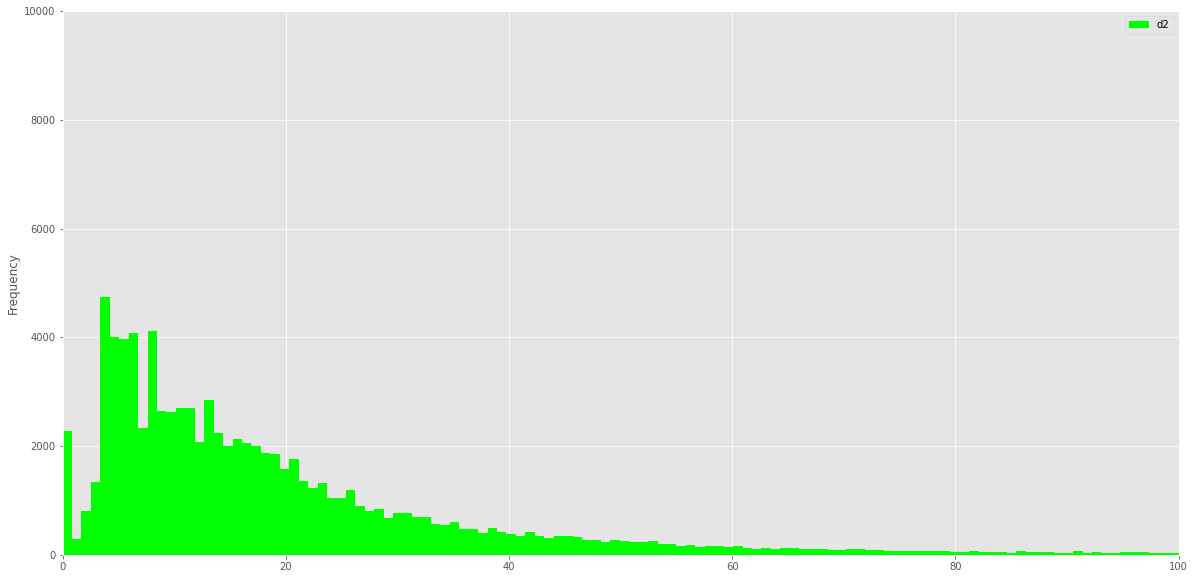

In [6]:
dfg = df_sum4.iloc[:,[3]]
dfg.plot(kind='hist',
         stacked=False,
         density=False,
         bins=4000,
         alpha=1,
         figsize=(20,10),
         grid=True, 
         xticks=[0, 20, 40, 60, 80, 100],
         xlim=[0,100],
         yticks=[0, 2000, 4000, 6000, 8000, 10000],
         ylim=[0,10000],
         colormap='brg_r',
        )
plt.savefig('200510_A549_aGPIb_SMA_BSA1hr_hist6_demo.png')
plt.savefig('200510_A549_aGPIb_SMA_BSA1hr_hist6_demo.pdf')
plt.savefig('200510_A549_aGPIb_SMA_BSA1hr_hist6_demo.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


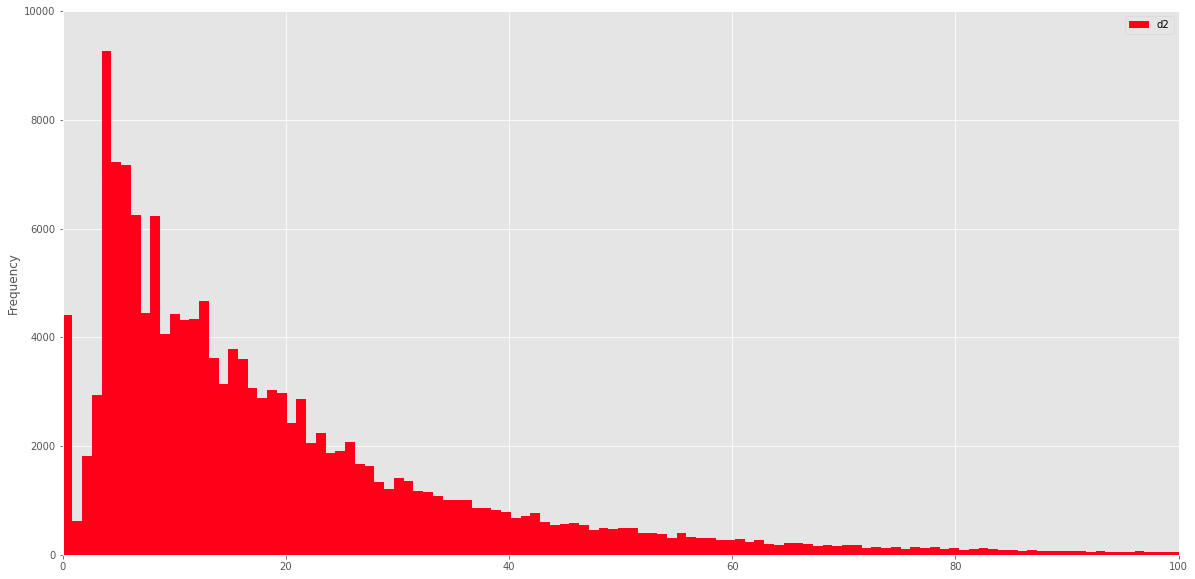

In [7]:
dfg = df_sum4.iloc[:,[7]]
dfg.plot(kind='hist',
         stacked=False,
         density=False,
         bins=4000,
         alpha=1,
         figsize=(20,10),
         grid=True,
         xticks=[0, 20, 40, 60, 80, 100],
         xlim=[0,100],
         yticks=[0, 2000, 4000, 6000, 8000, 10000],
         ylim=[0,10000],
         colormap='hsv_r',
        )
plt.savefig('200510_A549_aGPIb_SMA_Tb1hr_hist7_demo.png')
plt.savefig('200510_A549_aGPIb_SMA_Tb1hr_hist7_demo.pdf')
plt.savefig('200510_A549_aGPIb_SMA_Tb1hr_hist7_demo.eps')

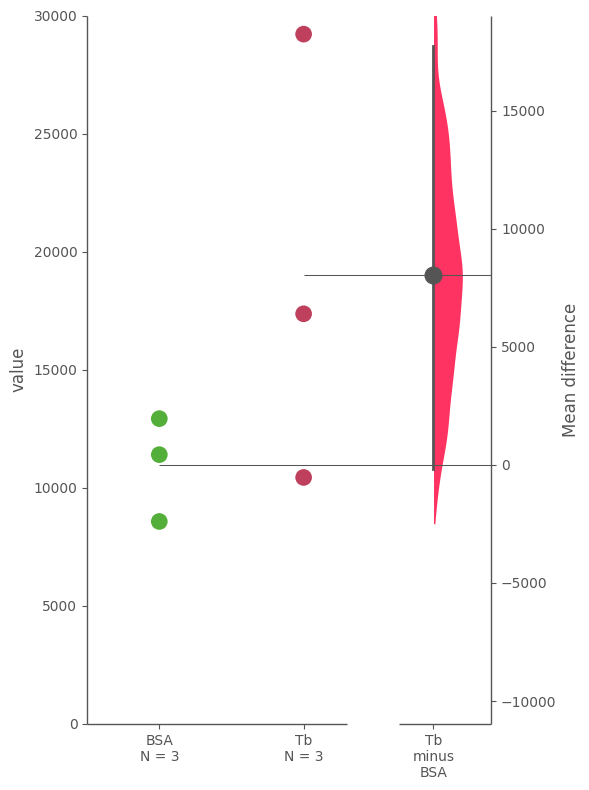

In [8]:
# Load the csv dataset
df = pd.read_csv("200510_190305A549_col_02.csv")
df = df.iloc[:,[0,1]]

# Load the above data into 'dabest'
df_dabest = dabest.load(df, idx=("BSA", "Tb"), ci=95)
df_dabest.mean_diff.plot(fig_size=(6, 8),
                         custom_palette="prism",
                         raw_marker_size=12, es_marker_size=12, swarm_ylim=(0, 30000))

plt.savefig('200510_A549_aGPIb_SMA_1hr_TotCol01_demo.png')
plt.savefig('200510_A549_aGPIb_SMA_1hr_TotCol01_demo.pdf')
plt.savefig('200510_A549_aGPIb_SMA_1hr_TotCol01_demo.eps')